<a href="https://colab.research.google.com/github/muhamadsaepulrizal/Praktikum_AI_Workflow/blob/main/Praktikum_AI_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd

#buat data
data = {
    "Tanggal":["2025-03-06", "2025-03-07", "2025-03-08", "2025-03-09", "2025-03-10", "2025-03-11", "2025-03-12", "2025-03-13", "2025-03-14", "2025-03-15"],
    "Produk":["Beras", "Terigu", "Gula", "Telur", "Susu Kaleng", "Buah", "Minyak Goreng", "Garam", "Cabai", "Bawang"],
    "Jumlah Terjual":[5, 10, 15, 25, 25, 15, 10, 12, 13, 14],
    "Stok":[30, 20, 40, 50, 20, 30, 45, 50, 20, 60],
    "Harga Satuan":[15000, 4000, 8000, 12000, 7000, 20000, 36000, 3000, 5000, 6000]
}

#simpan dalam dataFrame
df = pd.DataFrame(data)

#simpan sebagai file csv
df.to_csv("data_penjualan_latihan", index=False)

print("file csv berhasil dibuat dan disimpan sebagai 'data_penjualan_latihan'!")


file csv berhasil dibuat dan disimpan sebagai 'data_penjualan_latihan'!


baca file csv

In [11]:
#membaca file csv
df = pd.read_csv("data_penjualan_latihan")

#menampilkan data
print(data)

{'Tanggal': ['2025-03-06', '2025-03-07', '2025-03-08', '2025-03-09', '2025-03-10', '2025-03-11', '2025-03-12', '2025-03-13', '2025-03-14', '2025-03-15'], 'Produk': ['Beras', 'Terigu', 'Gula', 'Telur', 'Susu Kaleng', 'Buah', 'Minyak Goreng', 'Garam', 'Cabai', 'Bawang'], 'Jumlah Terjual': [5, 10, 15, 25, 25, 15, 10, 12, 13, 14], 'Stok': [30, 20, 40, 50, 20, 30, 45, 50, 20, 60], 'Harga Satuan': [15000, 4000, 8000, 12000, 7000, 20000, 36000, 3000, 5000, 6000]}


konversi kolom tanggal ke format datetime

In [12]:
#konversi kolom "Tanggal" ke format datetime
df["Tanggal"] = pd.to_datetime(df["Tanggal"])
df

,Tanggal,Produk,Jumlah Terjual,Stok,Harga Satuan
0,2025-03-06,Beras,5,30,15000
1,2025-03-07,Terigu,10,20,4000
2,2025-03-08,Gula,15,40,8000
3,2025-03-09,Telur,25,50,12000
4,2025-03-10,Susu Kaleng,25,20,7000
5,2025-03-11,Buah,15,30,20000
6,2025-03-12,Minyak Goreng,10,45,36000
7,2025-03-13,Garam,12,50,3000
8,2025-03-14,Cabai,13,20,5000
9,2025-03-15,Bawang,14,60,6000


tambahkan 2 kolom baru Total Penjualan & Keuntungan

In [15]:
#tambah kolom "Total Penjualan"
df["Total Penjualan"] = df["Jumlah Terjual"] * df["Harga Satuan"]

#tambahkan kolom "Keuntungan" (asumsi modal 10.000 per produk)
df["Keuntungan"] = df["Total Penjualan"] - (df["Jumlah Terjual"] * 10000)

df

,Tanggal,Produk,Jumlah Terjual,Stok,Harga Satuan,Total Penjualan,Keuntungan
0,2025-03-06,Beras,5,30,15000,75000,25000
1,2025-03-07,Terigu,10,20,4000,40000,-60000
2,2025-03-08,Gula,15,40,8000,120000,-30000
3,2025-03-09,Telur,25,50,12000,300000,50000
4,2025-03-10,Susu Kaleng,25,20,7000,175000,-75000
5,2025-03-11,Buah,15,30,20000,300000,150000
6,2025-03-12,Minyak Goreng,10,45,36000,360000,260000
7,2025-03-13,Garam,12,50,3000,36000,-84000
8,2025-03-14,Cabai,13,20,5000,65000,-65000
9,2025-03-15,Bawang,14,60,6000,84000,-56000


tampilkan 5 data pertama

In [22]:
df.head()

,Tanggal,Produk,Jumlah Terjual,Stok,Harga Satuan,Total Penjualan,Keuntungan
0,2025-03-06,Beras,5,30,15000,75000,25000
1,2025-03-07,Terigu,10,20,4000,40000,-60000
2,2025-03-08,Gula,15,40,8000,120000,-30000
3,2025-03-09,Telur,25,50,12000,300000,50000
4,2025-03-10,Susu Kaleng,25,20,7000,175000,-75000


melatih model AI

In [17]:
!pip install scikit-learn

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#pilih fitur (X) dan target (y)
X = df[["Jumlah Terjual", "Stok"]]
y = (df["Stok"] < 5).astype(int) #1 jika stok kurang dari 5, 0 jika cukup

#split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#buat model decision tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#evaluasi model
y_pred = model.predict(X_test)
print("Akurasi model : ", accuracy_score(y_test, y_pred))


Akurasi model :  1.0


prediksi restok (Execute & Insights)

In [20]:
#Execute(menggunakan model untuk prediksi di google collab)

#contoh produk baru (jumlah terjual 8, stok 3)
produk_baru = [[8,3]]
prediksi = model.predict(produk_baru)

if prediksi[0] == 1:
  print("Produk pelru di-restock!!")
else:
  print("Stok masih cukup.")


Stok masih cukup.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


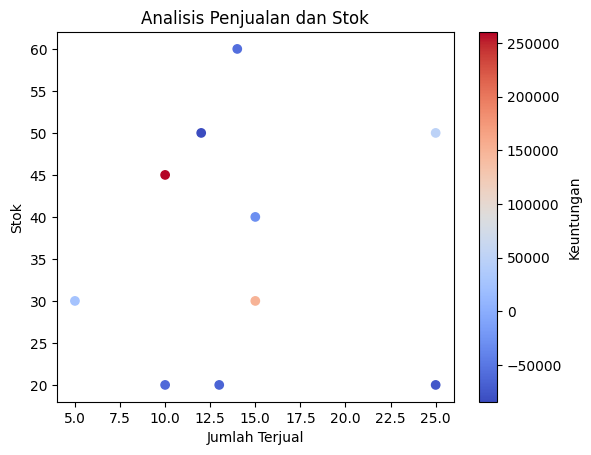

In [21]:
#provide Insight to make decision(analisis data di google collab)

import matplotlib.pyplot as plt

plt.scatter(df["Jumlah Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Analisis Penjualan dan Stok")
plt.colorbar(label="Keuntungan")
plt.show()